In [207]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [208]:
file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/WaveDrum01_09#HH#train.wav"

/tmp/ipykernel_7379/2515803236.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Hmag = librosa.amplitude_to_db(H)
/tmp/ipykernel_7379/2515803236.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Pmag = librosa.amplitude_to_db(P)


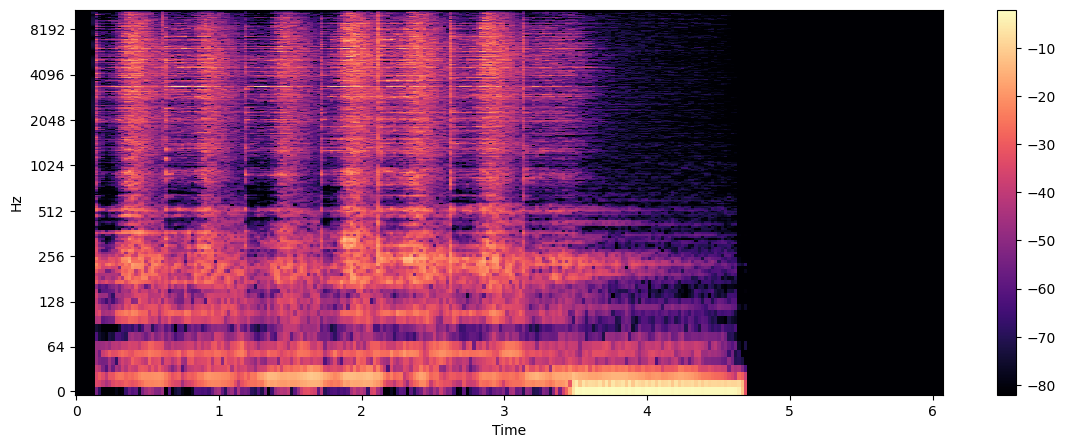

In [209]:
x, sr = librosa.load(file_path)
X = librosa.stft(x)

H, P = librosa.decompose.hpss(X)

Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

librosa.display.specshow(Hmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
p = librosa.istft(P)

# ipd.Audio(x, rate=sr)
ipd.Audio(p, rate=sr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2981
16
[ 0.98  1.26  1.5   1.67  4.54  9.77  9.81 10.15 11.28 11.59 11.73 11.89
 15.26 15.51 15.66 20.55]


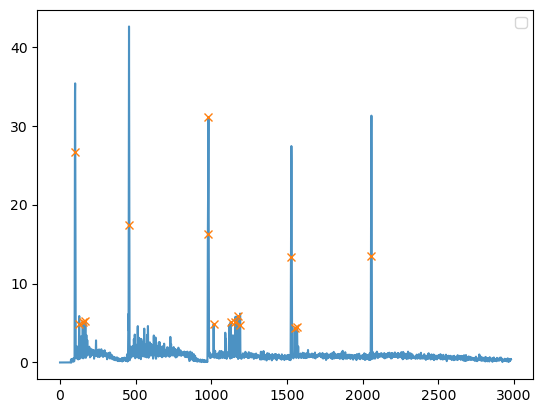

In [26]:
import librosa
import numpy as np
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

# file_path=  "../data/raw/IDMT-SMT-DRUMS-V2/audio/RealDrum01_00#MIX.wav"
file_path="../data/raw/ENST-drums-public/drummer_1/audio/hi-hat/008_hits_pedal-hi-hat-open_pedal_x5.wav"
# file_path="../data/raw/ddm-own/per-drum/0_CC/08/CC_08_9962.m4a"
# file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/WaveDrum02_28#MIX.wav"
# file_path="../data/raw/ENST-drums-public/drummer_1/audio/wet_mix/137_MIDI-minus-one_rock'n'roll-188_sticks.wav"
# file_path = "../data/raw/ddm-own/per-drum/0_CC/04/CC_04_9967.m4a"
# file_path = "../data/raw/ddm-own/per-drum/1_HH/16/HH_16_0038.m4a"

y, sr = librosa.load(file_path,sr=None)
# y = y[5*sr:15*sr]
sr=44100
o_env = librosa.onset.onset_strength(y=y, sr=sr,hop_length=441,lag=3)
print(len(o_env))
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr,hop_length=441)
onset_times = librosa.frames_to_time(onset_frames,sr=44100,hop_length=441)
print(len(onset_frames))
print(onset_times)
# import matplotlib.pyplot as plt
# D = np.abs(librosa.stft(y, hop_length=441))
# fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                          x_axis='time', y_axis='log', ax=ax)

plt.plot(o_env, alpha=0.8)
plt.plot(onset_frames, o_env[onset_frames], "x")
plt.legend(frameon=True, framealpha=0.8)

ipd.Audio(y,rate=sr)


In [12]:
import librosa
import numpy as np

# file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/RealDrum01_00#MIX.wav"

y, _ = librosa.load(file_path,sr=44100)
sr=44100
print(sr)
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         hop_length=441,
                                         aggregate=np.median)
peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=3, delta=5, wait=0.5)
times = librosa.frames_to_time(peaks, hop_length=441, sr=sr)
print(peaks)
frames = peaks[(peaks < 1200)]
print(len(peaks))
print(times)
ipd.Audio(y, rate=sr)

44100
[ 98 454]
2
[0.98 4.54]


In [30]:
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

first_pos = (onset_frames[8]*441)/sr
# first_pos=1.37
# first_pos = (peaks[0]*441)/sr
print(first_pos)
trimmed = y[int(max((first_pos-0.01)*sr,0)): int(min((first_pos+0.6), (onset_frames[len(onset_frames)-1]*441)/sr-0.01)*sr)]
# trimmed = y[int(max((first_pos)*sr,0)): ]

ipd.Audio(trimmed, rate=sr)

11.28


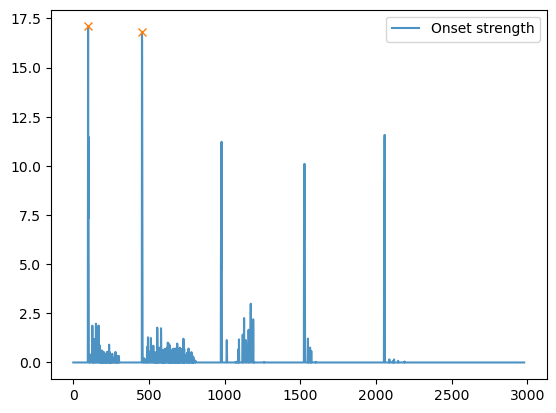

In [13]:
import matplotlib.pyplot as plt
# times = librosa.times_like(onset_env, sr=sr, hop_length=512)
# fig, ax = plt.subplots(nrows=2, sharex=True)
# D = np.abs(librosa.stft(y))
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                          y_axis='log', x_axis='time', ax=ax[1])
plt.plot(onset_env, alpha=0.8, label='Onset strength')
plt.plot(peaks, onset_env[peaks], "x")
# plt.vlines(times[peaks], 0,
#              onset_env.max(), color='r', alpha=0.8,
#              label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
# plt.label_outer()